In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images to this
IMAGE_SIZE = [224, 224]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Colab Notebooks/archive.zip" # Update with your correct file path
extract_path = "/content/drive/MyDrive/Colab Notebooks"

# Extract ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction completed!")

Extraction completed!


In [ ]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False



  # useful for getting number of classes
#folders = glob('Datasets/Train/*')
folders = glob('/content/drive/MyDrive/Colab Notebooks/train/*')


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:

# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 7)                   │         175,623 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,890,311 (56.80 MB)

 Trainable params: 175,623 (686.03 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'/content/drive/MyDrive/Colab Notebooks/train/',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'/content/drive/MyDrive/Colab Notebooks/test/',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


# fit the modelS
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 508s 551ms/step - accuracy: 0.3707 - loss: 1.7296 - val_accuracy: 0.4358 - val_loss: 1.5455
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 491s 546ms/step - accuracy: 0.4801 - loss: 1.4256 - val_accuracy: 0.4712 - val_loss: 1.4752
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 479s 533ms/step - accuracy: 0.4995 - loss: 1.3855 - val_accuracy: 0.4834 - val_loss: 1.5408
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 476s 530ms/step - accuracy: 0.5189 - loss: 1.3369 - val_accuracy: 0.5141 - val_loss: 1.3083
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 488s 515ms/step - accuracy: 0.5374 - loss: 1.2904 - val_accuracy: 0.5194 - val_loss: 1.2948
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 503s 516ms/step - accuracy: 0.5419 - loss: 1.2669 - val_accuracy: 0.4617 - val_loss: 1.6995
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 501s 514ms/step - accuracy: 0.5473 - loss: 1.2779 - val_accuracy: 0.4890 - val_loss: 1.4746
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 498s 510ms/step - accuracy: 0.5493 -

In [ ]:
model.save(r'C:\Users\Abhi\OneDrive\Desktop\EmSc/emotions_new_model.keras')
directory = '/content/drive/MyDrive/Colab Notebooks'
file_path = os.path.join(directory, 'model.keras')

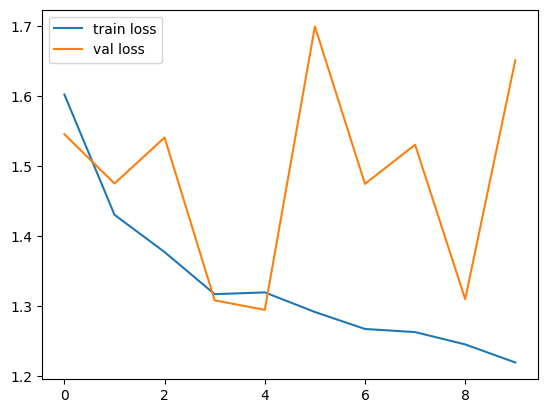

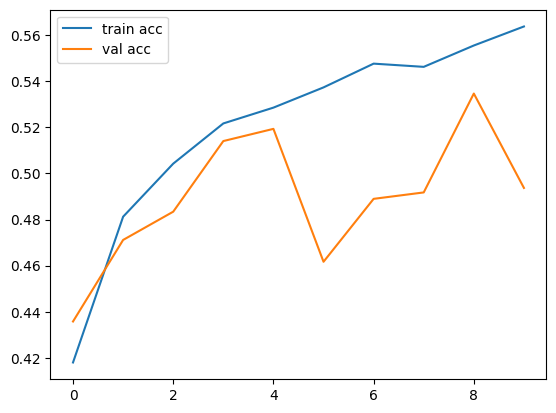

<Figure size 640x480 with 0 Axes>

In [ ]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc') # Changed 'acc' to 'accuracy'
plt.plot(r.history['val_accuracy'], label='val acc') # Changed 'val_acc' to 'val_accuracy'
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import os
print(os.listdir('/content/'))


['.config', 'sample_data']


In [ ]:
def ef(image):
    img = load_img(image)
    feature = np.array(img)
   # feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [ ]:
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
from tensorflow.keras.models import load_model

# Load the model from a file
model = load_model('/content/drive/MyDrive/Colab Notebooks/emotions_new_model.keras')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Define the label mapping
label = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Model prediction is: Angry


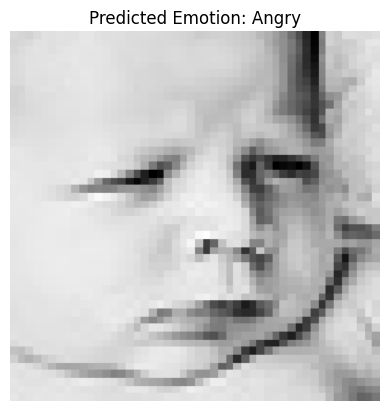

In [ ]:


# Load the image with the target size
img_path = '/content/drive/MyDrive/Colab Notebooks/test/angry/PrivateTest_88305.jpg'
img = image.load_img(img_path, target_size=(224, 224))

# Convert the image to an array
img_array = image.img_to_array(img)

# Expand dimensions to match the model's input shape
img_array = np.expand_dims(img_array, axis=0)

# Normalize the image data to [0, 1] range
img_array /= 255.0

# Load your pre-trained model
model = load_model('/content/drive/MyDrive/Colab Notebooks/emotions_new_model.keras')

# Make a prediction
pred = model.predict(img_array)

# Get the predicted label
pred_label = label[np.argmax(pred)]
print("original image is of angry")
print("Model prediction is:", pred_label)

# Display the image with the predicted label
plt.imshow(image.array_to_img(img_array[0]))
plt.title(f"Predicted Emotion: {pred_label}")
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from PIL import Image
import io

# JavaScript to capture an image
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = 'Capture';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // Resize the output to fit the video element.
            google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

            // Wait for Capture to be clicked.
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();
            const dataUrl = canvas.toDataURL('image/jpeg', quality);
            return dataUrl;
        }
        takePhoto({quality: %f}).then(dataUrl => {
            const img = document.createElement('img');
            img.src = dataUrl;
            document.body.appendChild(img);
            google.colab.kernel.invokeFunction('notebook.save_image', [dataUrl], {});
        });
    ''' % quality)
    display(js)

# Function to save the captured image
def save_image(dataUrl):
    header, encoded = dataUrl.split(',', 1)
    data = b64decode(encoded)
    with open('/content/photo.jpg', 'wb') as f:
        f.write(data)

# Register the function to handle the captured image
from google.colab import output
output.register_callback('notebook.save_image', save_image)

# Capture a photo
take_photo()


<IPython.core.display.Javascript object>

In [ ]:
# Load the captured image
image_path = '/content/drive/MyDrive/Colab Notebooks/test/angry/PrivateTest_88305.jpg'
image = Image.open(image_path)
frame = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Convert the image to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Load the Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/drive/MyDrive/Colab Notebooks/haarcascade_frontalface_default.xml')

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

# Load your pre-trained emotion detection model
from keras.models import load_model
emotion_model = load_model('/content/drive/MyDrive/Colab Notebooks/emotions_new_model.keras')

# Define the list of emotion labels
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

for (x, y, w, h) in faces:
    # Draw rectangle around the face
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

    # Extract the region of interest (ROI) for the face
    roi_gray = gray[y:y+h, x:x+w]
    roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

    # Preprocess the ROI for emotion classification
    if np.sum([roi_gray]) != 0:
        roi = roi_gray.astype('float') / 255.0
        roi = np.expand_dims(roi, axis=0)
        roi = np.expand_dims(roi, axis=-1)

        # Make a prediction on the ROI
        preds = emotion_model.predict(roi)[0]
        label = class_labels[preds.argmax()]
        label_position = (x, y - 10)

        # Display the label above the face rectangle
        cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

# Display the resulting frame
from google.colab.patches import cv2_imshow
cv2_imshow(frame)


error: OpenCV(4.11.0) /io/opencv/modules/objdetect/src/cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'detectMultiScale'


In [ ]:
import cv2
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array

# Load the Haar Cascade Classifier for face detection
face_classifier = cv2.CascadeClassifier('/content/drive/MyDrive/Colab Notebooks/haarcascade_frontalface_default.xml')

# Load the pre-trained emotion detection model
classifier = load_model('/content/drive/MyDrive/Colab Notebooks/emotions_new_model.keras')

# Define the list of emotion labels
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Initialize the webcam for video capture
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame from the webcam
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = face_classifier.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Draw a rectangle around each detected face
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # Extract the region of interest (ROI) for the face
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48), interpolation=cv2.INTER_AREA)

        # Preprocess the ROI for emotion classification
        if np.sum([roi_gray]) != 0:
            roi = roi_gray.astype('float') / 255.0
            roi = img_to_array(roi)
            roi = np.expand_dims(roi, axis=0)

            # Predict the emotion
            preds = classifier.predict(roi)[0]
            label = class_labels[preds.argmax()]
            label_position = (x, y - 10)

            # Display the label above the rectangle
            cv2.putText(frame, label, label_position, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
        else:
            cv2.putText(frame, 'No Face Found', (20, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Display the resulting frame
    cv2.imshow('Emotion Detector', frame)

    # Break the loop if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()
